# ¿Qué son los indicadores técnicos?

#### Los indicadores técnicos son todas aquellas fórmulas matemáticas/estadísticas usadas para analizar los movimientos de los precios de un activo en concreto dentro del Mercado Financiero. Son útiles porque ayudan a la predicción de cambios en las tendencia de precios con cierta anticipación para actuar racionalmente. Además, ofrecen un resultado visual, por lo que no son difíciles de interpretarlas, ya que se añaden a un gráfico de series temporales. 

#### Existen varios tipos de indicadores, los cuales, se pueden agrupar, los más conocidos son los siguientes tres: 



#### Indicadores de tendencia 

#### Indicadores de volatilidad

#### Indicadores de momentum 

#### Teniendo esto claro, implementemoslas en un gráfico. En este caso lo haremos usando Python, no obstante, se puede hacer en cualquier herramienta de trading de su preferencia. En este caso, aplicaremos las técnicas en mi empresa favorita: NVDIA. 

#### Cargamos librerias que usaremos en este proyecto

In [ ]:
import datetime as dt # para manipular las fechas
import pandas as pd # para la creación de dataframe
import numpy as np # uso de fórmulas matemáticas

import yfinance as yf # aquí descargamos los precios historicos 
import plotly.graph_objs as go # se suele usar matplot o seaborn, pero esta librería me parece estéticamente mejor
from plotly.subplots import make_subplots 

import talib as ta # esta librería ofrece algunas funciones relacionadas con el análisis técnico, por lo que no tendremos que hacer largos codigos


pd.options.plotting.backend = 'plotly'

In [68]:
end = dt.datetime.now()
start = dt.datetime(2023, 9, 28)

ticker = "NVDA"
df = yf.download(ticker, start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-28,42.459999,43.445999,42.115002,43.089001,43.075966,424663000
2023-09-29,43.827000,44.144001,43.306999,43.499001,43.485844,397830000
2023-10-02,44.029999,45.174999,43.861000,44.782001,44.768456,433298000
2023-10-03,44.807999,45.130001,43.245998,43.516998,43.503834,470850000
2023-10-04,43.742001,44.143002,43.292000,44.041000,44.027683,361821000
...,...,...,...,...,...,...
2024-09-26,126.800003,127.669998,121.800003,124.040001,124.040001,302582900
2024-09-27,123.970001,124.029999,119.260002,121.400002,121.400002,271009200
2024-09-30,118.309998,121.500000,118.150002,121.440002,121.440002,226553700


### Medias móviles como indicador de tendencia

#### Se podría catalogar como el indicador más usado y más simple del que se dispone. Se calculan como el promedio de un conjunto específico de datos, lo que nos proporciona una línea suavizada que sigue de cerca el movimiento general de los precios. Usualmente se usa la media móvil simple (SMA), que es la media aritmética de los valores. 

#### Interpretacíon:
#### la media móvil suaviza los valores, por lo que podemos ver la tendencia de los precios, si es alzista o bajista y tomar decisiones dependiendo de cada situación. 


#### las medias móviles se escinden en otros dos tipos, las cuales son:

#### Media móvil ponderada (WMA): Asigna mayor peso a los datos más recientes, lo que hace que la media sea más sensible a los cambios recientes en los precios.
#### Media móvil exponencial (EMA): Similar a la WMA, pero utiliza una fórmula matemática más compleja que asigna pesos decrecientes a los datos más antiguos.

#### Matemáticamente la media móvil simple (SMA) se formaliza como sigue: 

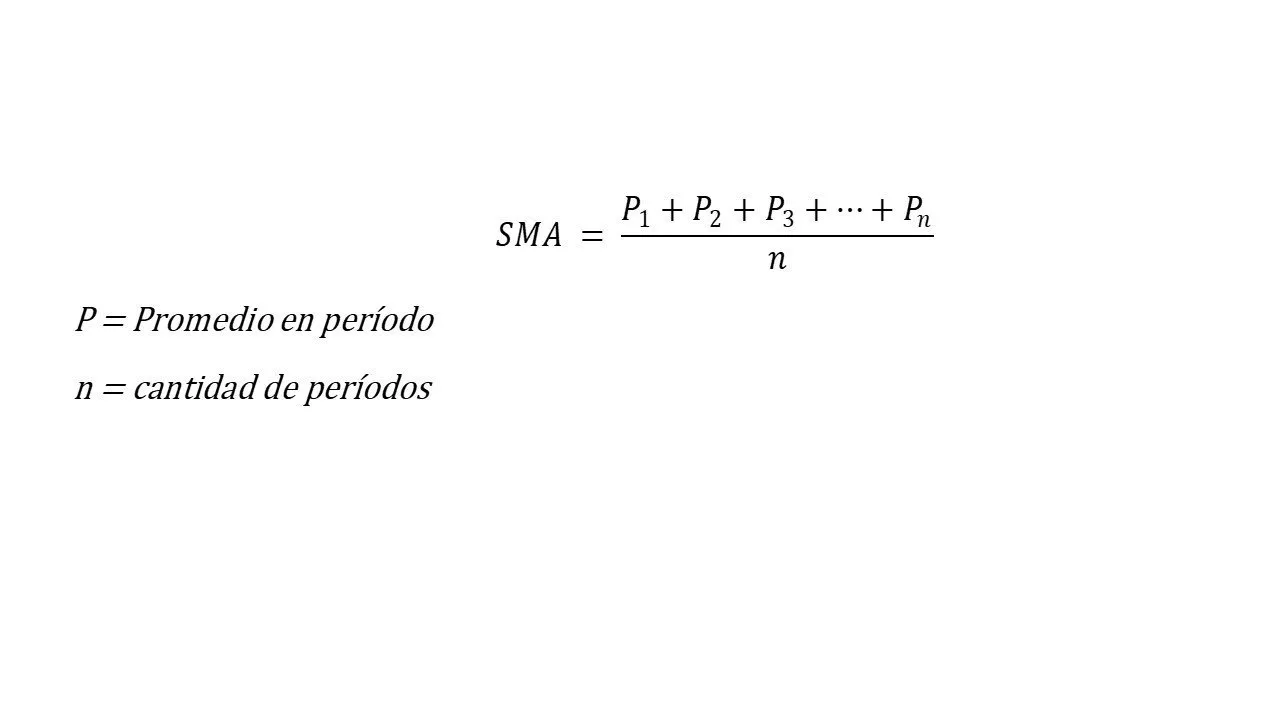

#### !Ahora implementemoslo en Python!

In [69]:
# Con la siguiente linea de código calculamos una media móvil de 20 días para el conjunto de datos
df["SMA"] = df["Close"].rolling(20).mean()

# Gráficamos el precio de cierre con su respectiva media móvil y ¡Tadam!
fig = df[["Close", "SMA"]].plot(title = "Precio de NVDIA y media móvil de 20 días")
fig.show()

### Bandas Bollinger como indicador de volatilidad

#### Lleva su nombre por John Bollinger quien la diseño (para los curiosos de la historia). Se componen de una media móvil simple (SMA) y dos bandas situadas a una distancia determinada, usualmente 2 desviaciones estándar (o típica), una encima de la otra. Estas bandas son sensibles a los cambios de precio de la acción, por lo que en periodos de alta volatilidad se ensanchan y se estechan en periodos de baja volatilidad.

#### Interpretacíon:
#### Si el precio esta por encima de la banda superior, la acción esta sobrevalorada; en el sentido contrario, si el precio ésta por debajo de la banda inferior, la acción esta infravalorada. 

#### Para calcular las bandas de Bollinger se usan dos fórmulas, la primera para la media móvil simple, por lo que es válida la ecuación antes expuesta, y la ultima de la desviación estándar respecto a la media móvil simple, que es como sigue: 

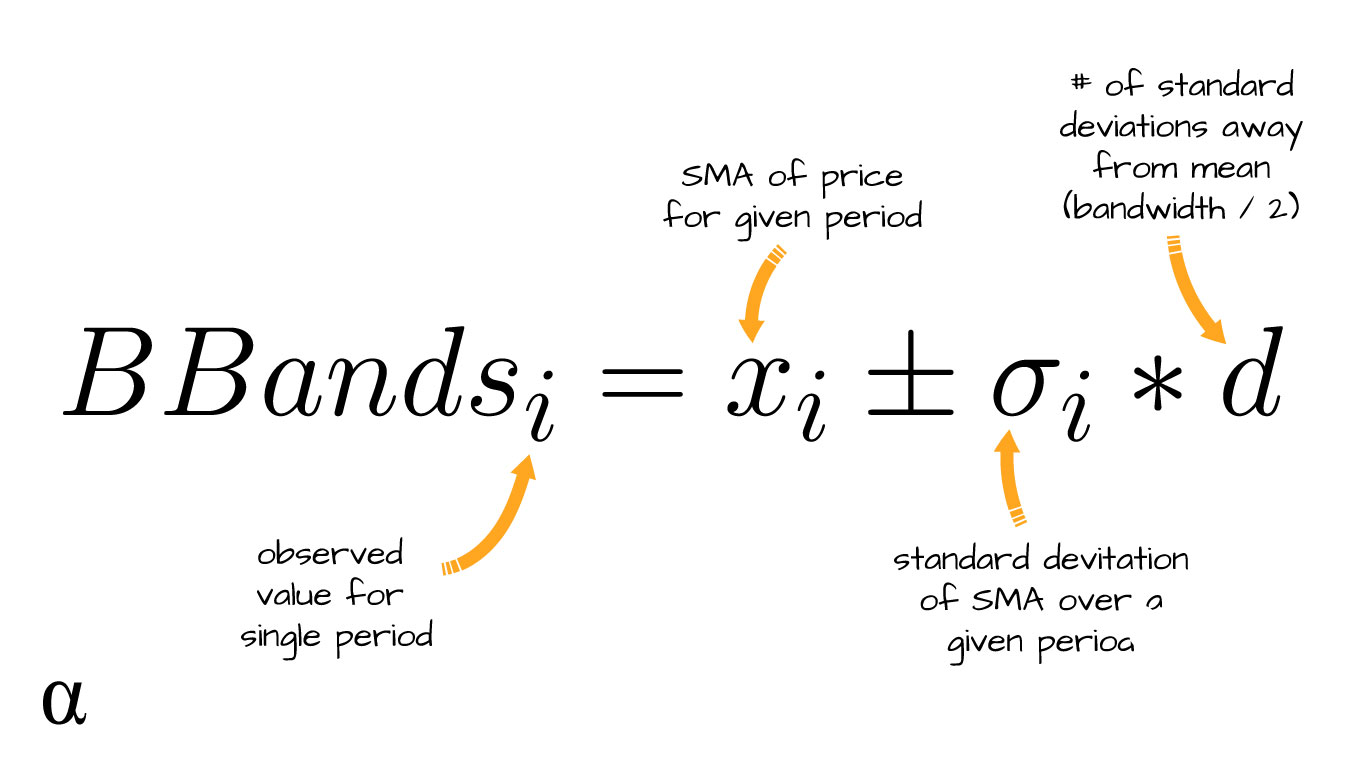
 



#### ¡Momento de implementarlo en Python!

#### Haremos el supuesto de que la media móvil simple es de 20 días, o periodos. 

In [70]:
# se calcula la media móvil para 20 días
#df["SMA"] = df["Close"].rolling(20).mean()

# calculamos la desviación estándar para 20 días
df["SD"] = df["Close"].rolling(window = 20).std()

# ahora teniendo la desviación estándar, hallamos la bandas superior e inferior
df["UB"] = df["SMA"] + 2 * df["SD"] # banda superior
df["lB"] = df["SMA"] - 2 * df["SD"] # banda inferior

# ¡Momento de gráficar!

fig2 = go.Figure()

fig2.add_trace(go.Scatter(x = df.index, y= df["Close"], name = "Precio"))

# Añadimos las bandas superior e inferior 

fig2.add_trace(go.Scatter(x= df.index, y =df["UB"], mode = "lines", name= "Banda superior", line = dict(color = "red")))
fig2.add_trace(go.Scatter(x= df.index, y =df["lB"], fill= "tonexty", mode = "lines", name= "Banda inferior", line = dict(color = "green")))

# Añadimos ahora la media móvil 

fig2.add_trace(go.Scatter(x= df.index, y = df["SMA"], mode = "lines", name = "Media móvil de 20 días", line= dict(color= "grey")))

# Ponemos titulo y etiquetas

fig2.update_layout(title = "Precio de NVDIA con Bandas de Bollinger",
                   xaxis_title = "Fecha",
                   yaxis_title = "Precio de cierre",
                   showlegend= True)

fig2.show()

### RSI como indicador de momentum

#### RSI (Relative Strength index) sirve para medir la fuerza y rápidez de las subidas o bajadas de los precios de un acción en concreto. De modo que detecta las condiciones de sobrevaloración o subvaloración del activo. En otras palabras: compara la fortaleza de un valor en los días en que los precios suben con su fortaleza en los días en que los precios bajan. Relacionar el resultado de esta comparación con la acción del precio puede dar a los operadores una idea de cómo puede comportarse un valor.

#### Interpretación: 

#### Oscila entre 0 y 100, siendo 70 el nivel de sobrecompra y 30 el de sobreventa. Cuando el RSI está por encima de 70, sugiere que el activo está subiendo demasiado rápido y podría experimentar una corrección a la baja. Por el contrario, cuando está por debajo de 30, indica que el activo está bajando demasiado rápido y podría estar listo para una recuperación.

#### El RSI se calcula en base al tipo de media móvil, como se menciono antes, trabajaremos con la media móvil simple, por lo que la fórmula se escribiría como sigue: 

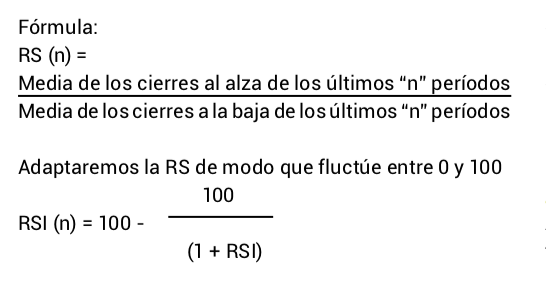

#### Para el calculo del RSI se va utilizar la libreria talib, la cuál cuenta como muchas funciones para el análisis técnico, la función talib.RSI cuenta con inputs: "real" que son los precios, ya sea el de cierre, apertura, etc;  de "timeperiod" que toma un valor de un número entero que representa el período utilizado para el cálculo del RSI, por defecto es 14.

#### Les comparto el siguiente link si gustan descargarlo: https://ta-lib.org/

### ¡Momento de usar Python!

In [71]:
# Se calcula el RSI en base a 14 días
df["rsi"] = ta.RSI( real=df["Close"], timeperiod= 14)

# Creamos los subplots
fig3 = make_subplots(rows= 2, cols=1, row_heights= [.7, .3]) 

# Trazamos la serie temporal de los precios de cierre de NVDIA
fig3.add_trace(go.Scatter(x = df.index, y = df["Close"], name = "Precio NVDIA"), row = 1, col = 1)

# Hacemos lo mismo para los valores RSI de NVDIA
fig3.add_trace(go.Scatter(x = df.index, y = df["rsi"], name= "RSI"), row= 2, col=1)

# Dibujamos una linea en el eje y de 70 para zanjar el límite cuando el precio esta sobrecomprado
fig3.add_hline(y=70, row=2, col=1, 
              line=dict(color='red', width=2, dash='dash'))

# Lo mismo hacemos en el eje y de 30 cuando el precio esta sobrevendido
fig3.add_hline( y = 30, row= 2, col= 1,
               line = dict(color = "green", width = 2, dash = "dash"))

# Añadimos puntos en la primera gráfica cuando el RSI este por encima de 70
fig3.add_trace(go.Scatter(x=df[df['rsi'] > 70].index,
                         y=df[df['rsi'] > 70]['Close'],
                         mode='markers',
                         marker=dict(size=4, color='red'),
                         name='RSI above 70',
                         showlegend=False),
              row=1, col=1)

# Añadimos puntos en la primera gráfica cuando el RSI este por debajo de 30
fig3.add_trace(go.Scatter(x=df[df['rsi'] < 30].index,
                         y=df[df['rsi'] < 30]['Close'],
                         mode='markers',
                         marker=dict(size=4, color='green'),
                         name='RSI below 30',
                         showlegend=False),
              row=1, col=1)

# Ponemos una título y mostramos las gráficas
fig3.update_layout(title=f"Precio de {tickers} y RSI", showlegend=False)

fig3.show()

#### ¡Y eso sería todo! Obviamente los indicadores técnicos no se utilizan por separado, se trabaja mejor usando varios a la vez. 

#### Por último, quisiera dejarles una serie de links, a modo de bibliografía. Siempre tengo presente una frase de Newton: "Si he logrado ver más lejos, ha sido porque he subido a hombros de gigantes." Por lo que les comparto de donde saque la información de fórmulas, códigos y demás cosas que he usado en este post. 

https://mayerkrebs.com/relative-strength-index-rsi-in-python/

https://www.disnat.com/en/learning/trading-basics/technical-analysis/the-relative-strength-index-rsi

https://medium.com/@financial_python/how-to-plot-bollinger-bands-in-python-1d7cc95ad9af

https://www.montartuempresa.com/wp-content/uploads/2015/10/manual_analisis_tecnico_w.pdf

https://www.expansion.com/diccionario-economico/indicador-tecnico.html

https://www.rankia.com/blog/sistemas-de-trading/6448754-bandas-bollinger-que-son-como-usan-trading

https://www.bancosantander.es/glosario/rsi-o-indice-de-fuerza-relativa

https://www.youtube.com/watch?v=1lkpW0Retmc&list=PL9-npOaAMXaRs75YPBemz3t--1Zf3f7yn&index=24

https://medium.com/@BDPO/unlock-the-power-of-technical-analysis-with-rsi-and-plotly-a-comprehensive-guide-for-traders-2f209faf5cbf

https://www.alpharithms.com/bollinger-bands-590615/

https://www.rankia.com/blog/bolsa-desde-cero/4458958-como-utiliza-rsi





